In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from PIL import Image

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')

In [4]:
imgsrc = r'../plots/prebake.png'

In [5]:
img = Image.open(imgsrc)

In [7]:
size = img.size

In [11]:
def side_crop(img, side: bool):
    size = img.size
    if side:
        sel = (size[1]//2, 0, size[0], size[1])
    else:
        sel = (0, 0, size[0]//2, size[1])
    return img.crop(sel)

In [15]:
def baker_map(img):
    size = img.size
    l_img = side_crop(img, 0)
    lsize = l_img.size
    l_str = l_img.resize((lsize[1],lsize[0]))
    r_img = side_crop(img, 1)
    rsize = r_img.size
    r_str = r_img.resize((rsize[1],rsize[0]))
    out = Image.new(img.mode, img.size)
    out.paste(l_str, (0, 0))
    out.paste(r_str, (0, size[1]//2))
    return out

In [30]:
def frepeat(f, n, arg):
    if n == 0:
        return arg
    elif n == 1:
        return f(arg)
    else:
        return frepeat(f, n-1, f(arg))

In [39]:
img2 = Image.open(r'../plots/prebake-test.png')

In [48]:
np.arange(0, 21, 4)

array([ 0,  4,  8, 12, 16, 20])

In [65]:
frepeat(baker_map, 6 ,img).save('../plots/baker-map/baker-map-06.png')

In [51]:
for _ in np.arange(0, 20, 4):
    a = frepeat(baker_map, _, img)
    a.save(rf'../plots/baker-map/baker-map-{str(_).zfill(2)}.png')

In [52]:
import matplotlib.image as mpimg

In [56]:
axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [67]:
import itertools

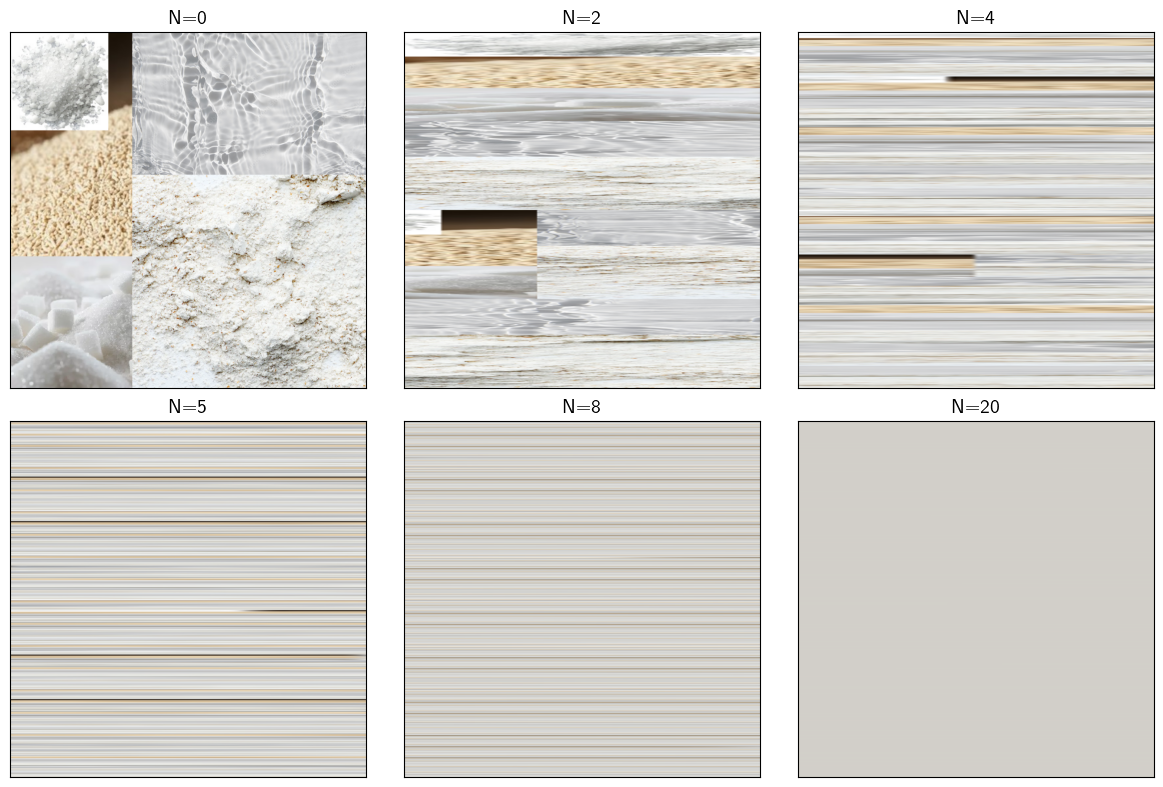

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(mpimg.imread(r'../plots/baker-map/baker-map-00.png'))
axes[0, 1].imshow(mpimg.imread(r'../plots/baker-map/baker-map-02.png'))
axes[0, 2].imshow(mpimg.imread(r'../plots/baker-map/baker-map-04.png'))
axes[1, 0].imshow(mpimg.imread(r'../plots/baker-map/baker-map-06.png'))
axes[1, 1].imshow(mpimg.imread(r'../plots/baker-map/baker-map-08.png'))
axes[1, 2].imshow(mpimg.imread(r'../plots/baker-map/baker-map-20.png'))

ns = [0, 2, 4, 5, 8, 20]

for _, ax in enumerate(axes.flatten()):
    ax.set_title(rf"N={ns[_]}")

for ax in axes.ravel():
    # ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

plt.show()